# Домашняя работа 1. Numpy

Это первая короткая домашка на закрепление пройденного на вводных семинарах.

*Дедлайн: 20 сентября, 21:00*

### Оценивание и штрафы
Все задачки в этом задании весят **одинаковое** число баллов. Максимально допустимая оценка за работу — **5 баллов**.

Задание выполняется самостоятельно,  иначе все сопричастные получат 0 баллов :) Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы.

### О задании

Во всех задачах необходимо дописать функции и убедиться, что они работают.
Вам в помощь уже прописаны [asserts](https://python-reference.readthedocs.io/en/latest/docs/statements/assert.html), которые точно должны быть пройдены :)

При решении задач нельзя использовать циклы (`for`, `while`) и оператор `if` (там, где не просят для сравнения).

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

In [1]:
import numpy as np

#### Задача 1

Найдите максимальный элемент в векторе среди элементов, перед которыми стоит нулевой.

Пример:

`Input: np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])` 

`Output: 5`

In [2]:
def max_after_zero(x: np.array) -> int:
    return np.max(x[1:][x[:-1]==0])

In [3]:
x = np.array([0, 1, 2, 0, 6, 0, 10, 0])
assert max_after_zero(x) == 10
print("OK")

OK


#### Задача 2

Дан трёхмерный массив `img`, содержащий изображение размера `(height, width, numChannels)`, а также вектор `weights` длины `numChannels`. Сложите каналы изображения с указанными весами и верните результат в виде матрицы размера `(height, width)`. 

В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты `np.array([0.299, 0.587, 0.114])`. Возьмите прикольную картинку на радость ассистенту и нарисуйте ее до и после преобразования.

In [4]:
def grayscale(img: np.array, weights: np.array) -> np.array:
    return np.sum(img * weights[None, None, :], axis = 2)

In [5]:
img = np.arange(1*2*3).reshape(1, 2, 3)
weights = np.array([0.299, 0.587, 0.114])
res = np.array([[ 0.815,  3.815]])
assert np.allclose(grayscale(img, weights), res)
print("OK")

OK


In [6]:
# your code here 
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

%matplotlib inline

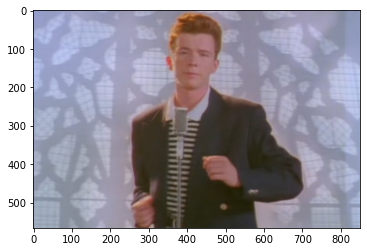

In [7]:
url = "https://cdnimg.rg.ru/img/content/214/17/88/22_d_850.jpg"
response = requests.get(url)
img_before = np.asarray(Image.open(BytesIO(response.content)))
plt.imshow(img_before)

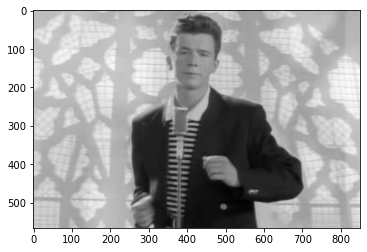

In [8]:
img_after = grayscale(img_before, np.array([0.299, 0.587, 0.114]))
plt.imshow(img_after, cmap="gray")

#### Задача 3

Даны две выборки объектов — X и Y (с одинаковым числом столбцов, объекты расположены по строкам). Вычислите матрицу евклидовых расстояний между объектами. 

Для этой задачи реализуйте также функцию без использования numpy (с циклами). Сравните по скорости работы векторизованную версию с невекторизованной и с готовой реализацией `scipy.spatial.distance.cdist` на случайно сгенерированных матрицах размера 100 x 1000 (сравнения приведите ниже в ноутбуке).

In [9]:
def cdist_numpy(X: np.array, Y: np.array) -> np.array:
    return (np.sum((X[:, None]-Y[None, :])**2, axis = 2))**0.5

In [10]:
def cdist_python(X: np.array, Y: np.array) -> np.array:
    matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            matrix[i, j] = sum([(x[c]-y[c])**2 for c in range(len(x))])**0.5
    return matrix

In [11]:
from scipy.spatial.distance import cdist
X = np.arange(12).reshape(4, 3)
Y = np.arange(1, 16).reshape(5, 3)
assert np.allclose(cdist(X, Y), cdist_numpy(X, Y))
assert np.allclose(cdist(X, Y), cdist_python(X, Y))
print("OK")

OK


In [12]:
np.random.seed(42)
X = np.random.rand(100, 1000)
Y = np.random.rand(100, 1000)

In [13]:
%%time
cdist_numpy(X, Y)

Wall time: 75.8 ms


array([[12.60459491, 13.15643233, 13.05073767, ..., 12.96869616,
        12.6505051 , 12.75556801],
       [13.02357854, 12.68784904, 13.21295531, ..., 13.01520869,
        12.89173704, 13.19088624],
       [13.02060701, 13.06914397, 12.77180446, ..., 12.96169659,
        12.66448867, 13.1527725 ],
       ...,
       [12.75522057, 12.83266244, 12.64625935, ..., 12.75911805,
        12.87417032, 12.68550563],
       [13.06909515, 12.94724728, 12.63176254, ..., 13.06865299,
        12.60681318, 12.68720565],
       [12.98996887, 13.11688298, 12.71963367, ..., 12.94064157,
        12.77310306, 13.06379499]])

In [14]:
%%time
cdist_python(X, Y)

Wall time: 7.39 s


array([[12.60459491, 13.15643233, 13.05073767, ..., 12.96869616,
        12.6505051 , 12.75556801],
       [13.02357854, 12.68784904, 13.21295531, ..., 13.01520869,
        12.89173704, 13.19088624],
       [13.02060701, 13.06914397, 12.77180446, ..., 12.96169659,
        12.66448867, 13.1527725 ],
       ...,
       [12.75522057, 12.83266244, 12.64625935, ..., 12.75911805,
        12.87417032, 12.68550563],
       [13.06909515, 12.94724728, 12.63176254, ..., 13.06865299,
        12.60681318, 12.68720565],
       [12.98996887, 13.11688298, 12.71963367, ..., 12.94064157,
        12.77310306, 13.06379499]])

In [15]:
%%time
cdist(X, Y)

Wall time: 26.9 ms


array([[12.60459491, 13.15643233, 13.05073767, ..., 12.96869616,
        12.6505051 , 12.75556801],
       [13.02357854, 12.68784904, 13.21295531, ..., 13.01520869,
        12.89173704, 13.19088624],
       [13.02060701, 13.06914397, 12.77180446, ..., 12.96169659,
        12.66448867, 13.1527725 ],
       ...,
       [12.75522057, 12.83266244, 12.64625935, ..., 12.75911805,
        12.87417032, 12.68550563],
       [13.06909515, 12.94724728, 12.63176254, ..., 13.06865299,
        12.60681318, 12.68720565],
       [12.98996887, 13.11688298, 12.71963367, ..., 12.94064157,
        12.77310306, 13.06379499]])

#### Задача 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок — это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [16]:
def block_matrix(block: np.array) -> np.array:
    return np.tile(block, (2,2))

In [17]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


#### Задача 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы можно считать целочисленными.

In [18]:
def diag_prod(matrix: np.array) -> int:
    return np.prod(np.diag(matrix), where = ~(np.diag(matrix) == 0))

In [19]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

OK


#### Задача 6

Во многих алгоритмах машинного обучения бывает полезно нормировать признаки, то есть приводить их к одному масштабу (например, от -1 до 1). Существуют разные способы, один из них — стандартизировать признаки, то есть вычесть из каждого значения признака его математическое ожидание и разделить на корень из дисперсии. Напишите функцию, нормализующую входящую матрицу (признаки расположены по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

В преобразованной матрице не должно быть nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему. Можете сослаться на склерновскую реализацию, `sklearn.preprocessing.StandardScaler`.

In [20]:
def normalize(matrix: np.array) -> np.array:
    mean = np.mean(matrix, axis = 0)
    std = np.std(matrix, axis = 0)
    
    # Avoidng dividing by zero
    std = np.where(std == 0, 1, std)
    
    return (matrix - mean[None, :])/std[None, :]

In [21]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


In [22]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)
print("OK")

OK


#### Задача 7

Напишите функцию, вычисляющую первообразную полинома (в качестве константы возьмите $42$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, 42])`, соответствующий полиному $x^4 + 2x^3 + x + 42$.

In [23]:
def antiderivative(coefs: np.array) -> np.array:
    indices = np.arange(coefs.shape[0], 0, -1)
    return np.append(coefs / indices, 42)

In [24]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
)
print("OK")

OK


In [25]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


#### Задача 8

Напишите функцию, которая превращает [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) в симметричную. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [26]:
def make_symmetric(matrix: np.array) -> np.array:
    diag = np.zeros(matrix.shape)
    np.fill_diagonal(diag, matrix.diagonal())
    return matrix.T + matrix - diag

In [27]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)
print("OK")

OK


In [28]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)
print("OK")

OK


#### Задача 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [29]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.repeat(np.arange(a, b+1)[None, :], m, axis = 0)

In [30]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)
print("OK")

OK


In [31]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)
print("OK")

OK


#### Задача 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают векторы `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [32]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))

In [33]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)
print("OK")

OK


In [34]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)
print("OK")

OK
